In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("atlantis_citizens_final.csv")
df.head()



,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2


##Dataset contains ~15k records with demographic, wealth and lifestyle attributes.
Target variable is Occupation

In [2]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15751 entries, 0 to 15750
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Citizen_ID        15751 non-null  object 
 1   Diet_Type         15751 non-null  object 
 2   District_Name     15751 non-null  object 
 3   Occupation        15751 non-null  object 
 4   Wealth_Index      14696 non-null  float64
 5   House_Size_sq_ft  14554 non-null  float64
 6   Life_Expectancy   15137 non-null  float64
 7   Vehicle_Owned     15751 non-null  object 
 8   Work_District     15751 non-null  object 
 9   Bio_Hash          15751 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


,Wealth_Index,House_Size_sq_ft,Life_Expectancy
count,14696.000000,14554.000000,15137.000000
mean,9529.708628,1417.153772,51.913391
std,20502.182375,2233.194323,16.567063
min,1000.000000,100.000000,20.000000
25%,1978.000000,205.000000,40.000000
50%,3794.500000,477.000000,49.000000
75%,8951.500000,1470.750000,60.000000
max,589377.000000,10000.000000,110.000000


##Classes are slightly imbalanced, which should be handled during modeling.

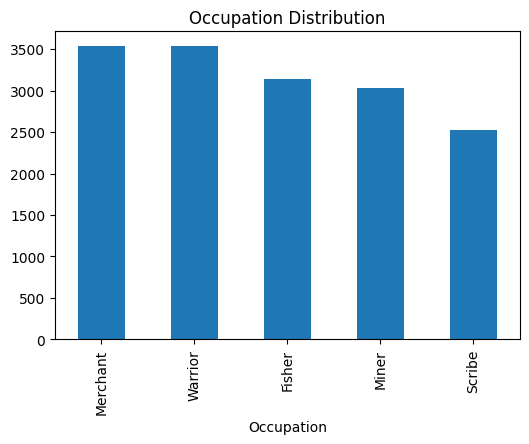

In [3]:
plt.figure(figsize=(6,4))
df['Occupation'].value_counts().plot(kind='bar')
plt.title("Occupation Distribution")
plt.show()


In [13]:
##Missing values mainly appear in Wealth_Index and House_Size_sq_ft

In [4]:
df.isna().sum()


Citizen_ID             0
Diet_Type              0
District_Name          0
Occupation             0
Wealth_Index        1055
House_Size_sq_ft    1197
Life_Expectancy      614
Vehicle_Owned          0
Work_District          0
Bio_Hash               0
dtype: int64

##Certain occupations show higher commute rates, suggesting work hubs separate from residential areas.

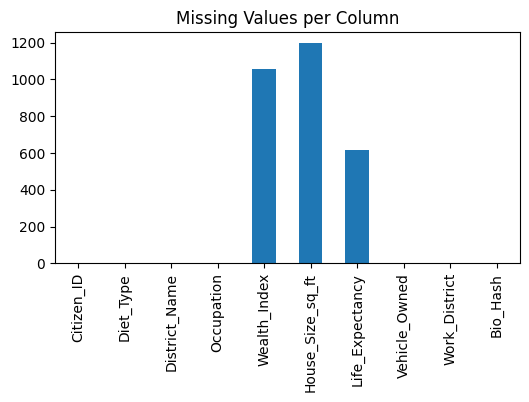

In [5]:
plt.figure(figsize=(6,3))
df.isna().sum().plot(kind='bar')
plt.title("Missing Values per Column")
plt.show()


##Large wealth disparity exists between districts

In [6]:
df['Commutes'] = (df['District_Name'] != df['Work_District']).astype(int)

df.groupby('District_Name')['Commutes'].mean().sort_values(ascending=False).head()


District_Name
The Golden Reef    0.728747
Coral Slums        0.664747
Deep Trench        0.632666
Mariana Plaza      0.632457
Name: Commutes, dtype: float64

##Weak to moderate positive correlation observed.

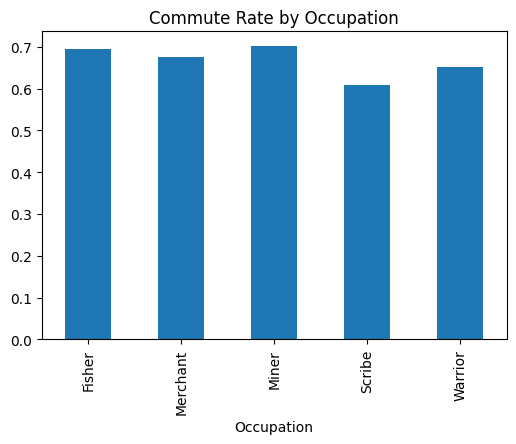

In [7]:
df.groupby('Occupation')['Commutes'].mean().plot(kind='bar', figsize=(6,4))
plt.title("Commute Rate by Occupation")
plt.show()


##Diet choice loosely reflects economic status.

In [8]:
district_wealth = df.groupby('District_Name')['Wealth_Index'].mean().dropna()

district_wealth.sort_values(ascending=False).head()
district_wealth.sort_values().head()


District_Name
Coral Slums         3371.414207
Deep Trench         4806.795825
Mariana Plaza       8535.553804
The Golden Reef    18726.909656
Name: Wealth_Index, dtype: float64

##Bio_Hash appears almost unique per citizen; treated as identifier-like feature.

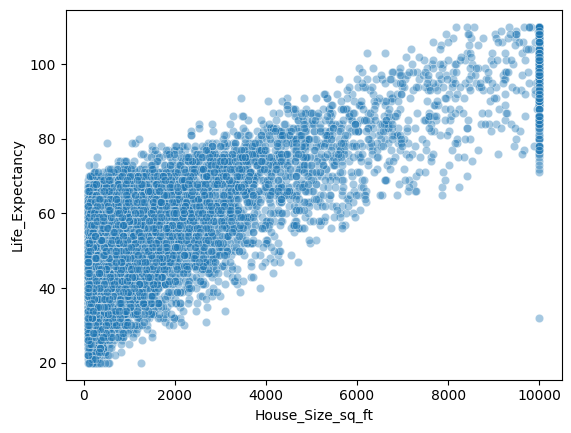

In [9]:
clean = df[['House_Size_sq_ft','Life_Expectancy']].dropna()

sns.scatterplot(data=clean, x='House_Size_sq_ft', y='Life_Expectancy', alpha=0.4)
plt.show()


In [10]:
clean.corr()


,House_Size_sq_ft,Life_Expectancy
House_Size_sq_ft,1.000000,0.797772
Life_Expectancy,0.797772,1.000000


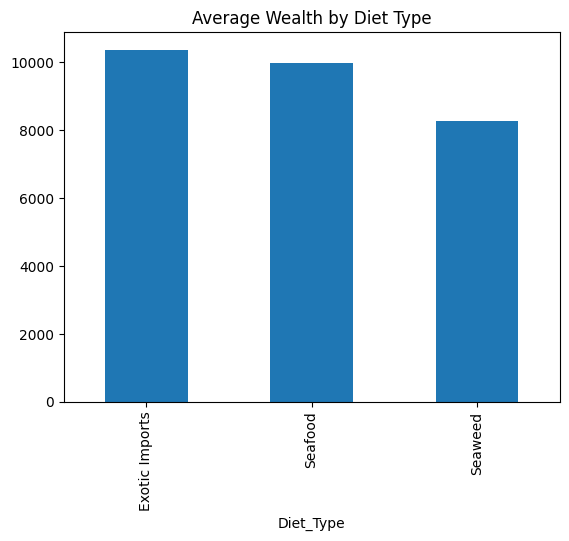

In [11]:
df.groupby('Diet_Type')['Wealth_Index'].mean().plot(kind='bar')
plt.title("Average Wealth by Diet Type")
plt.show()


In [12]:
df['Bio_Hash'].nunique(), len(df)


(15751, 15751)